In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
windfarm = pd.read_excel("Wind farm site 1 (Nominal capacity-99MW).xlsx")
windfarm.head()

Time(year-month-day h:m:s)  Wind speed at height of 10 meters (m/s)  \
0        2019-01-01 00:00:00                                    2.209   
1        2019-01-01 00:15:00                                    1.828   
2        2019-01-01 00:30:00                                    2.193   
3        2019-01-01 00:45:00                                    2.654   
4        2019-01-01 01:00:00                                    2.249   

   Wind direction at height of 10 meters (˚)  \
0                                     81.317   
1                                     77.460   
2                                     86.700   
3                                     78.160   
4                                     94.297   

   Wind speed at height of 30 meters (m/s)  \
0                                    1.991   
1                                    1.698   
2                                    2.313   
3                                    2.494   
4                                    2.192   

   Wind direction at height of 30 meters (˚)  \
0                                     74.814   
1                                     75.048   
2                                     84.688   
3                                     74.939   
4                                     91.140   

   Wind speed at height of 50 meters (m/s)  \
0                                    2.094   
1                                    1.757   
2                                    2.344   
3                                    2.574   
4                                    2.558   

   Wind direction at height of 50 meters (˚)  \
0                                     77.667   
1                                     88.733   
2                                     89.100   
3                                     87.267   
4                                     96.900   

   Wind speed - at the height of wheel hub (m/s)  \
0                                          2.494   
1                                          1.882   
2                                          2.350   
3                                          2.808   
4                                          2.924   

   Wind speed - at the height of wheel hub (˚)  \
0                                       74.500   
1                                       74.367   
2                                       89.000   
3                                       82.733   
4                                       92.967   

   Air temperature (deg celcius)   Atmosphere (hpa)  Relative humidity (%)  \
0                         -13.484           889.867                 76.320   
1                         -13.691           889.575                 76.757   
2                         -13.766           889.942                 76.981   
3                         -13.691           889.675                 76.821   
4                         -13.447           890.025                 74.571   

   Power (MW)  
0    0.254383  
1    0.329703  
2    0.296306  
3    0.187590  
4    0.081005

# CORRELATION BETWEEN THE WIND SPEEDS AT DIFFERENT HEIGHTS

In [15]:
df = pd.DataFrame(windfarm, columns=["Wind speed at height of 10 meters (m/s)", "Wind speed at height of 30 meters (m/s)", "Wind speed at height of 50 meters (m/s)",'Wind speed - at the height of wheel hub (m/s)'])
df.head()

Wind speed at height of 10 meters (m/s)  \
0                                    2.209   
1                                    1.828   
2                                    2.193   
3                                    2.654   
4                                    2.249   

   Wind speed at height of 30 meters (m/s)  \
0                                    1.991   
1                                    1.698   
2                                    2.313   
3                                    2.494   
4                                    2.192   

   Wind speed at height of 50 meters (m/s)  \
0                                    2.094   
1                                    1.757   
2                                    2.344   
3                                    2.574   
4                                    2.558   

   Wind speed - at the height of wheel hub (m/s)  
0                                          2.494  
1                                          1.882  
2                                          2.350  
3                                          2.808  
4                                          2.924

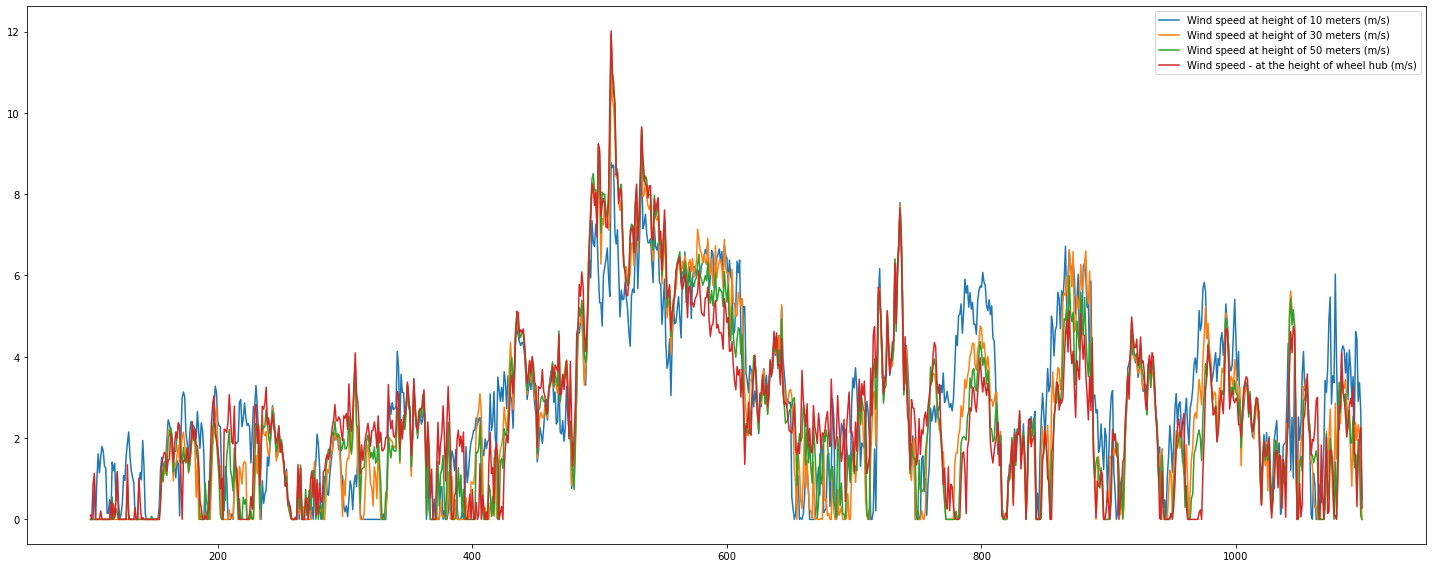

In [16]:
# Getting  1000 rows from df
df_1000 = df.iloc[100:1100]
plt.rcParams["figure.figsize"] = [20, 8]
plt.rcParams["figure.autolayout"] = True
df_1000.plot()
plt.show()

In [17]:
df_1000.to_csv('windprofile_site1.csv')

In [18]:
windfarm1 = windfarm.drop(labels=["Time(year-month-day h:m:s)"], axis=1)
windfarm1.head()

Wind speed at height of 10 meters (m/s)  \
0                                    2.209   
1                                    1.828   
2                                    2.193   
3                                    2.654   
4                                    2.249   

   Wind direction at height of 10 meters (˚)  \
0                                     81.317   
1                                     77.460   
2                                     86.700   
3                                     78.160   
4                                     94.297   

   Wind speed at height of 30 meters (m/s)  \
0                                    1.991   
1                                    1.698   
2                                    2.313   
3                                    2.494   
4                                    2.192   

   Wind direction at height of 30 meters (˚)  \
0                                     74.814   
1                                     75.048   
2                                     84.688   
3                                     74.939   
4                                     91.140   

   Wind speed at height of 50 meters (m/s)  \
0                                    2.094   
1                                    1.757   
2                                    2.344   
3                                    2.574   
4                                    2.558   

   Wind direction at height of 50 meters (˚)  \
0                                     77.667   
1                                     88.733   
2                                     89.100   
3                                     87.267   
4                                     96.900   

   Wind speed - at the height of wheel hub (m/s)  \
0                                          2.494   
1                                          1.882   
2                                          2.350   
3                                          2.808   
4                                          2.924   

   Wind speed - at the height of wheel hub (˚)  \
0                                       74.500   
1                                       74.367   
2                                       89.000   
3                                       82.733   
4                                       92.967   

   Air temperature (deg celcius)   Atmosphere (hpa)  Relative humidity (%)  \
0                         -13.484           889.867                 76.320   
1                         -13.691           889.575                 76.757   
2                         -13.766           889.942                 76.981   
3                         -13.691           889.675                 76.821   
4                         -13.447           890.025                 74.571   

   Power (MW)  
0    0.254383  
1    0.329703  
2    0.296306  
3    0.187590  
4    0.081005

In [19]:
###scaling all the numerical data 
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


num_vars = ['Wind speed at height of 10 meters (m/s)','Wind direction at height of 10 meters (˚)','Air temperature (deg celcius) ','Wind speed at height of 30 meters (m/s)', 'Wind direction at height of 30 meters (˚)', 'Wind speed at height of 50 meters (m/s)','Wind direction at height of 50 meters (˚)','Wind speed - at the height of wheel hub (m/s)','Wind speed - at the height of wheel hub (˚)','Atmosphere (hpa)','Relative humidity (%)','Power (MW)']
windfarm1[num_vars] = scaler.fit_transform(windfarm1[num_vars])

In [20]:
windfarm1

Wind speed at height of 10 meters (m/s)  \
0                                     0.086747   
1                                     0.071785   
2                                     0.086118   
3                                     0.104221   
4                                     0.088317   
...                                        ...   
70171                                 0.225329   
70172                                 0.225722   
70173                                 0.175457   
70174                                 0.146476   
70175                                 0.129236   

       Wind direction at height of 10 meters (˚)  \
0                                       0.226518   
1                                       0.215774   
2                                       0.241513   
3                                       0.217724   
4                                       0.262675   
...                                          ...   
70171                                   0.653506   
70172                                   0.638834   
70173                                   0.654990   
70174                                   0.675735   
70175                                   0.678947   

       Wind speed at height of 30 meters (m/s)  \
0                                     0.068215   
1                                     0.058177   
2                                     0.079248   
3                                     0.085449   
4                                     0.075102   
...                                        ...   
70171                                 0.219550   
70172                                 0.213485   
70173                                 0.150958   
70174                                 0.112379   
70175                                 0.113441   

       Wind direction at height of 30 meters (˚)  \
0                                       0.208345   
1                                       0.208997   
2                                       0.235843   
3                                       0.208693   
4                                       0.253810   
...                                          ...   
70171                                   0.655702   
70172                                   0.650046   
70173                                   0.705291   
70174                                   0.703150   
70175                                   0.708093   

       Wind speed at height of 50 meters (m/s)  \
0                                     0.070557   
1                                     0.059202   
2                                     0.078981   
3                                     0.086731   
4                                     0.086192   
...                                        ...   
70171                                 0.221545   
70172                                 0.214704   
70173                                 0.147618   
70174                                 0.107959   
70175                                 0.122751   

       Wind direction at height of 50 meters (˚)  \
0                                       0.216383   
1                                       0.247213   
2                                       0.248236   
3                                       0.243129   
4                                       0.269967   
...                                          ...   
70171                                   0.674312   
70172                                   0.668091   
70173                                   0.733842   
70174                                   0.748329   
70175                                   0.743128   

       Wind speed - at the height of wheel hub (m/s)  \
0                                           0.082454   
1                                           0.062221   
2                                           0.077694   
3                                           0.092836   
4                                           0.096

In [21]:
# seprating X and Y variables
X = windfarm1.iloc[:,  :-1].values
y = windfarm1.iloc[:, -1].values

In [22]:
df=pd.DataFrame(y)
df.to_csv('dataset1_power.csv')

In [23]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
# We specify random seed so that the train and test data set always have the same rows, respectively
#np.random.seed(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()

gs = GridSearchCV(model,
                  param_grid = {'max_depth': range(1, 11),
                                'min_samples_split': range(10, 60, 10)},
                  cv=5,
                  n_jobs=1,
                  scoring='neg_mean_squared_error')

gs.fit(X_train, y_train)

print(gs.best_params_)
print(-gs.best_score_)

KeyboardInterrupt: 

DECISION TREE TO IDENTIFY THE FEATURE IMPORTANCE 

MSE:  0.00884419154576475


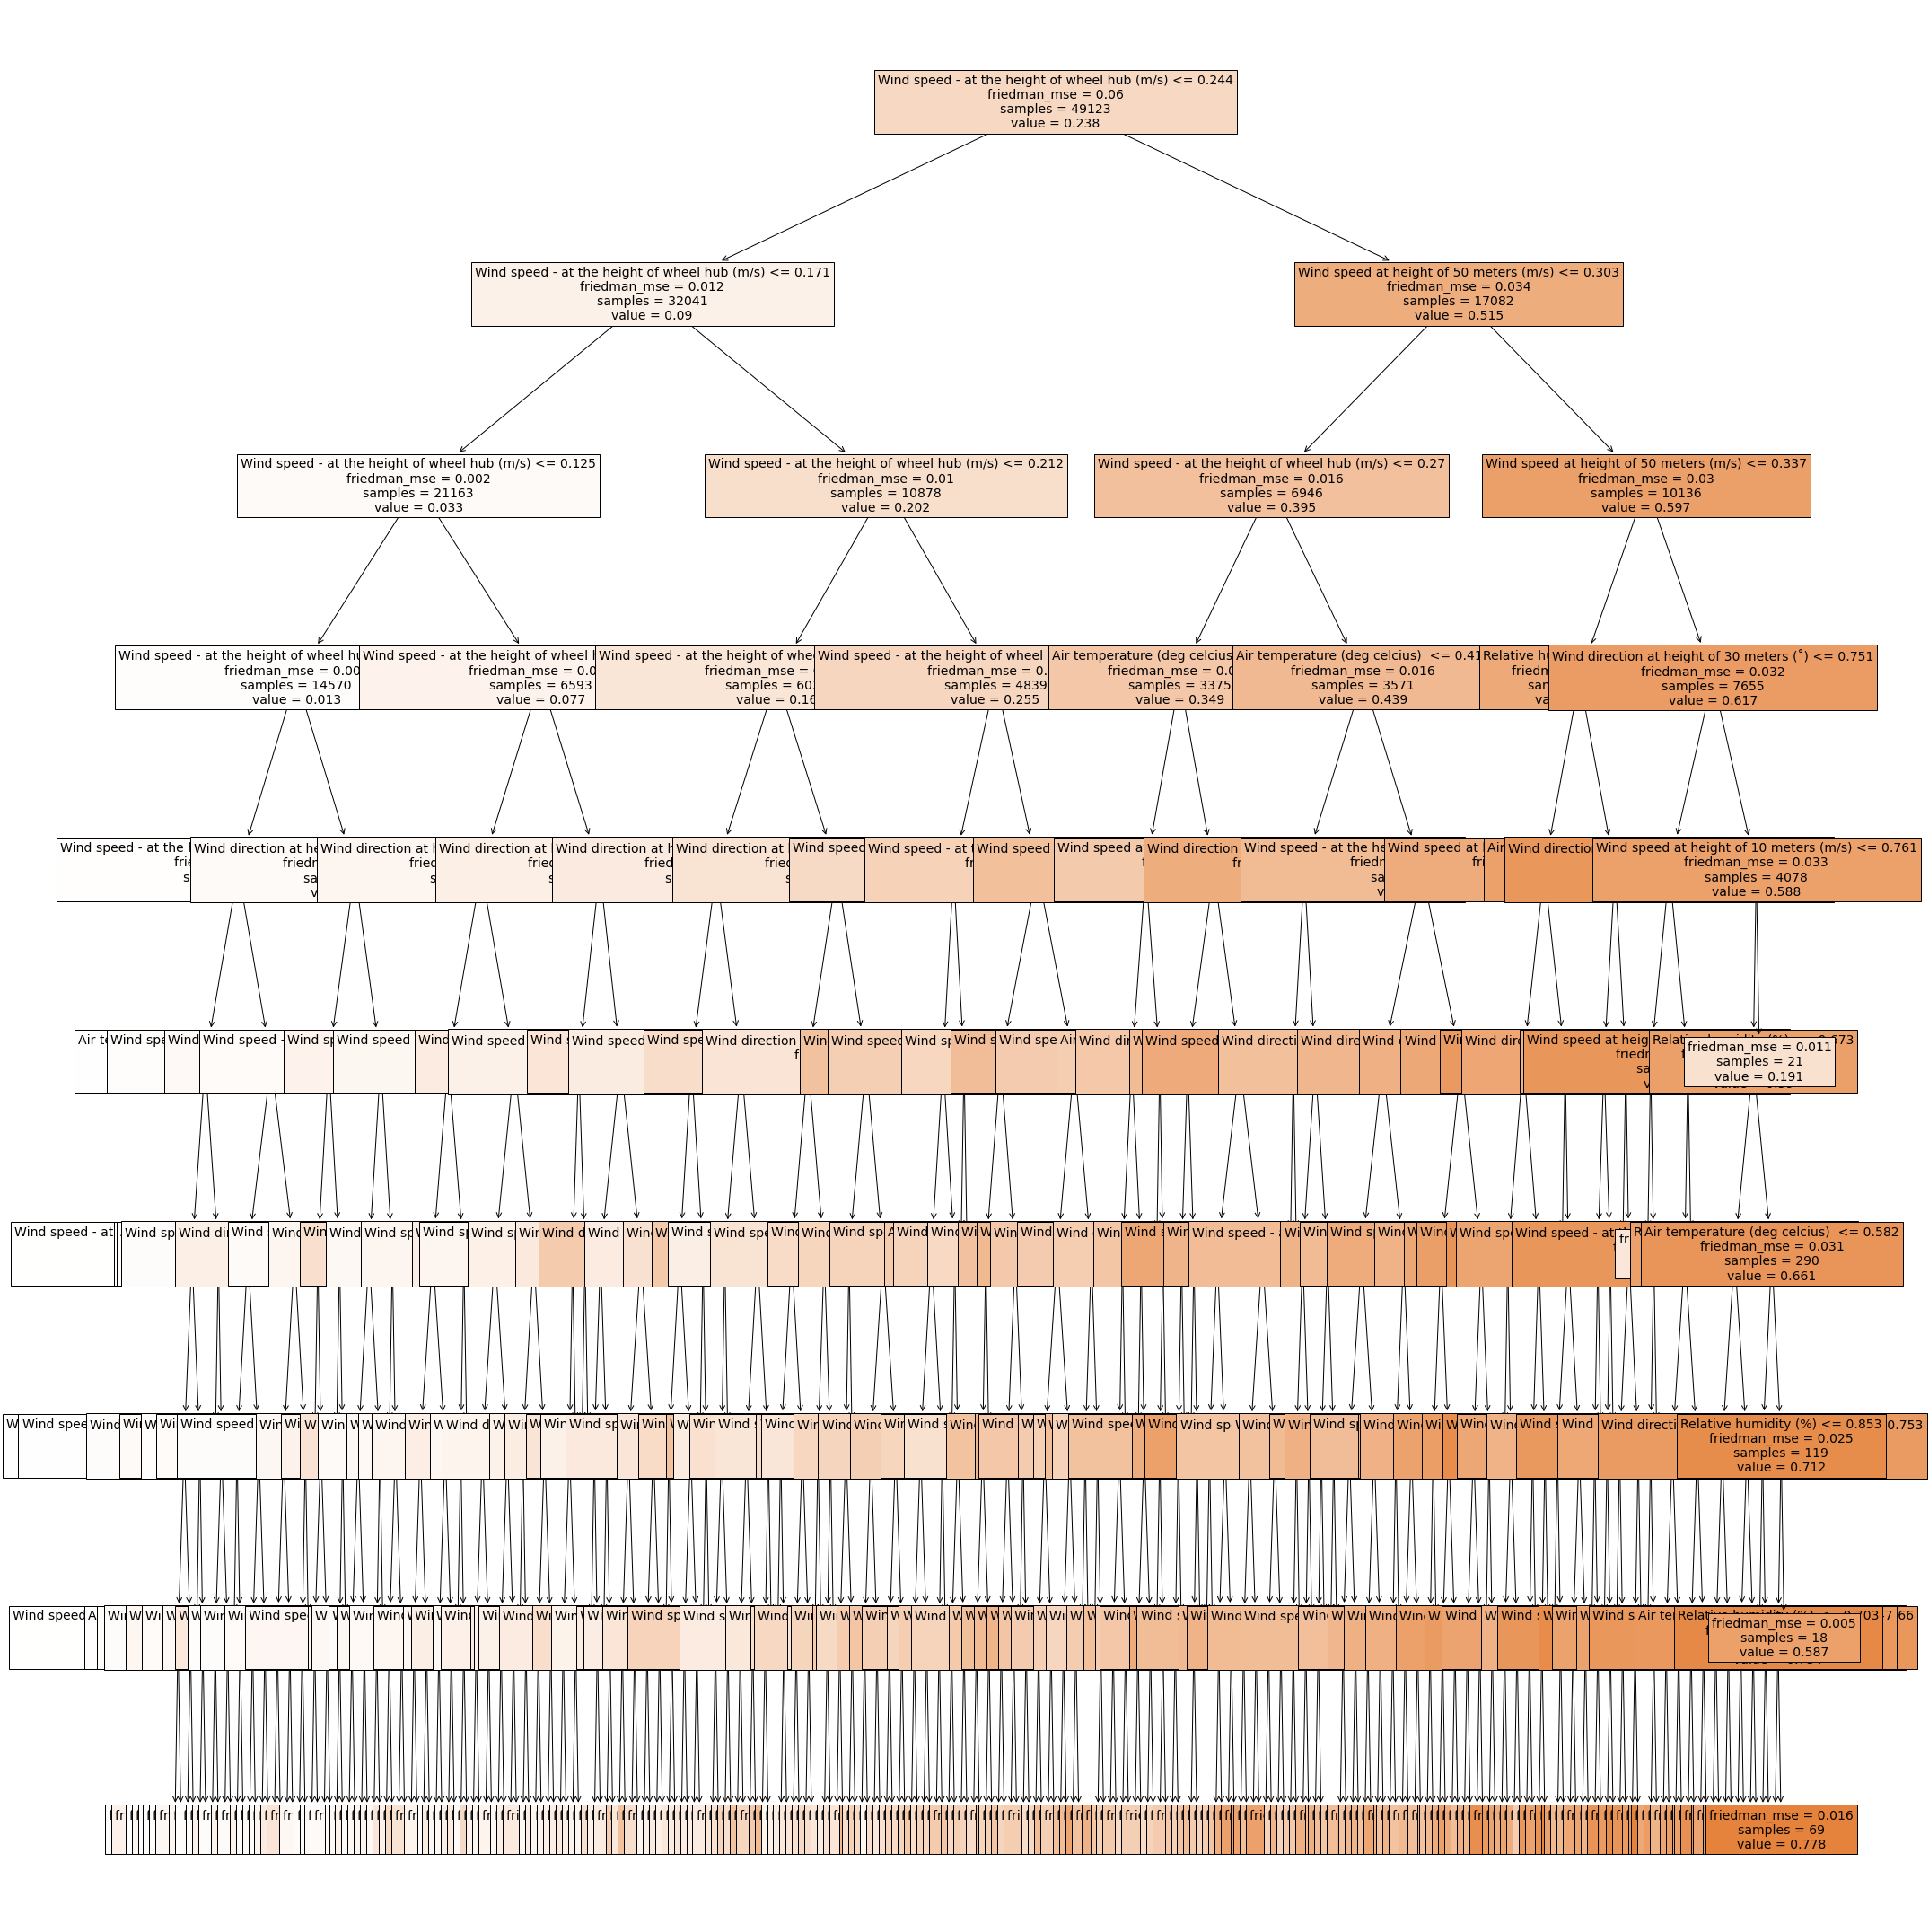

In [24]:
#from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(random_state = 0,min_samples_split= 50, max_depth=9,criterion='friedman_mse') 
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_pred = regressor.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
feature_names = list(windfarm1.columns)
from sklearn import tree
plt.figure(figsize=(30,30))


tree.plot_tree(regressor,feature_names= feature_names ,fontsize=14,filled=True)
plt.show()

In [25]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('r2 score  is', r2_score(y_test, y_pred))

Root Mean Squared Error: 0.09404356195808808
Mean Absolute Error: 0.057134453392191
r2 score  is 0.8552386324784615


Feature: 0, Score: 0.00450
Feature: 1, Score: 0.00198
Feature: 2, Score: 0.00593
Feature: 3, Score: 0.00600
Feature: 4, Score: 0.07076
Feature: 5, Score: 0.00512
Feature: 6, Score: 0.88900
Feature: 7, Score: 0.00587
Feature: 8, Score: 0.00679
Feature: 9, Score: 0.00022
Feature: 10, Score: 0.00384


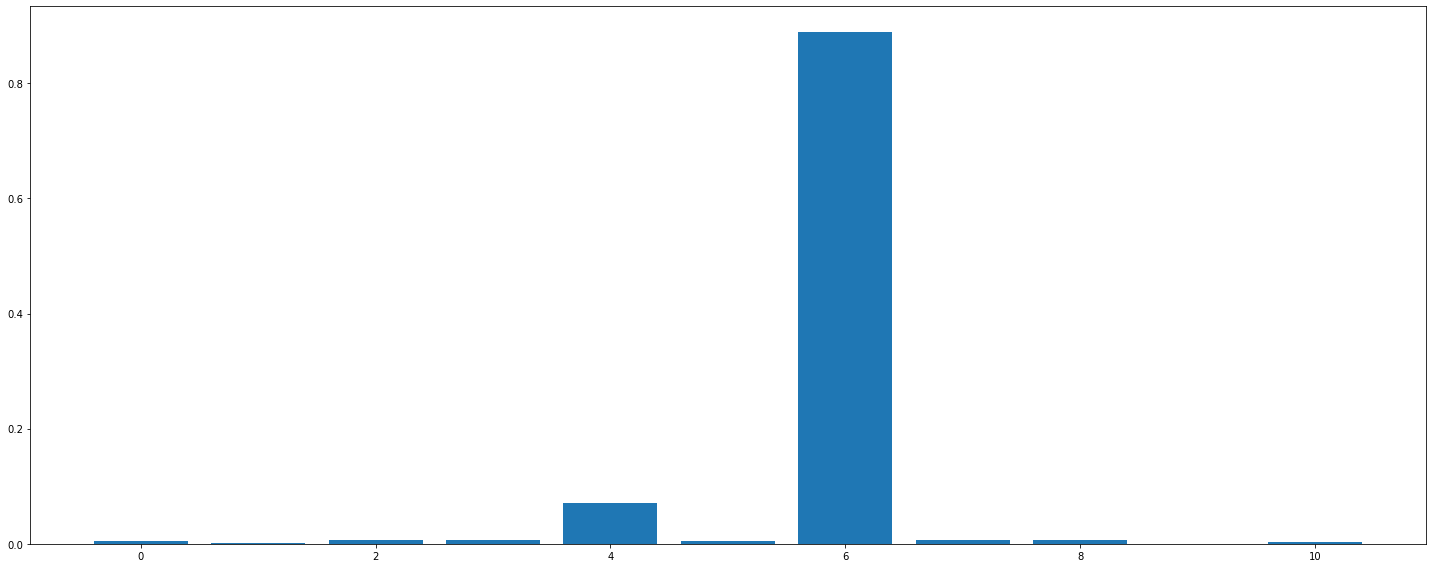

In [26]:
# get importance
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [27]:
###comparison of Actual  data with the predicted
comparison = pd.DataFrame()
comparison['Actual'] = y_test
comparison['predicted'] = y_pred
comparison

Actual  predicted
0      0.424553   0.325194
1      0.272725   0.271587
2      0.001905   0.002846
3      0.018269   0.006111
4      0.001434   0.006111
...         ...        ...
21048  0.080188   0.069012
21049  0.501003   0.504145
21050  0.011003   0.019042
21051  0.009178   0.004117
21052  0.865079   0.599124

[21053 rows x 2 columns]

In [28]:
#class sklearn.tree.DecisionTreeRegressor(*, criterion='friedman_mse', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0

Feature: 0, Score: 0.00450
Feature: 1, Score: 0.00198
Feature: 2, Score: 0.00593
Feature: 3, Score: 0.00600
Feature: 4, Score: 0.07076
Feature: 5, Score: 0.00512
Feature: 6, Score: 0.88900
Feature: 7, Score: 0.00587
Feature: 8, Score: 0.00679
Feature: 9, Score: 0.00022
Feature: 10, Score: 0.00384


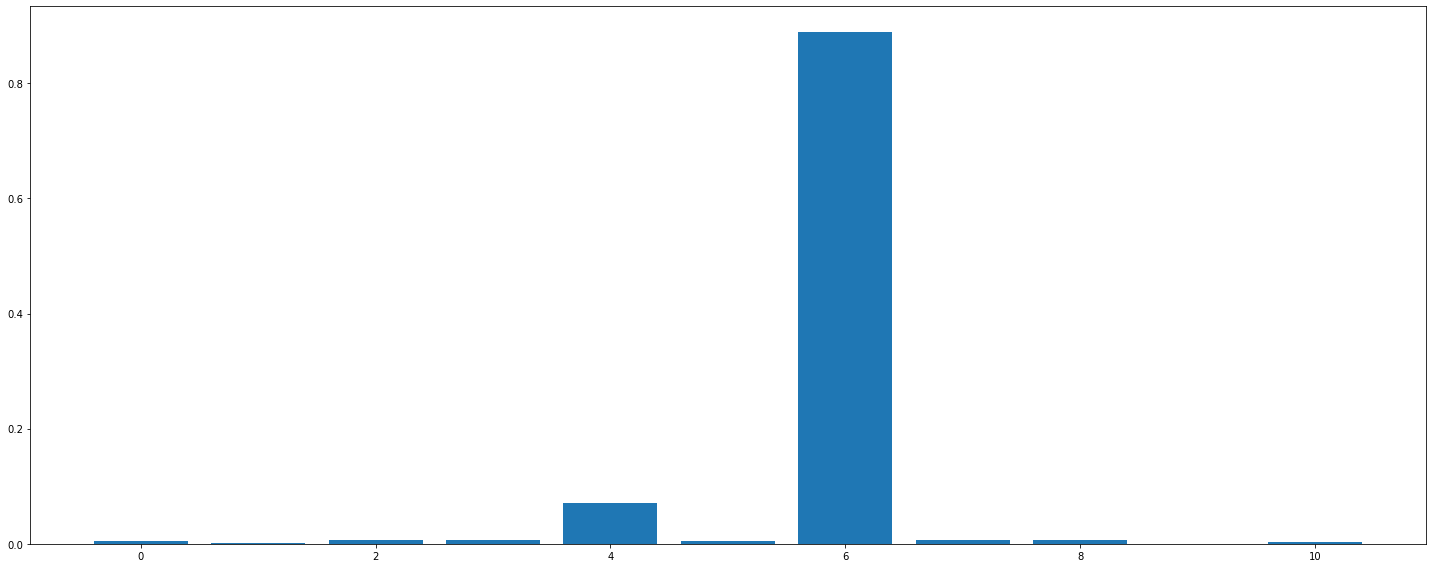

In [29]:
# get importance of each feature
importance = regressor.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

# RANDOM FOREST

In [ ]:
#param_grid = {
  #  'n_estimators': [25, 50, 100, 150],
 #   'max_features': ['sqrt', 'log2', None],
  #  'max_depth': [3, 6, 9],
 #   'max_leaf_nodes': [3, 6, 9],
#}

In [ ]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100],
    'max_features':  ['sqrt', 'log2', None],
    'min_samples_leaf': [3, 5],
    
    'n_estimators': [25, 100, 150]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

grid_search.fit(X_train, y_train)

print(grid_search.best_params_)
print(-grid_search.best_score_)

In [30]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 150, max_depth= 80,min_samples_leaf= 3,bootstrap= True,max_features= None,random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X, y)

RandomForestRegressor(max_depth=80, max_features=None, min_samples_leaf=3,
                      n_estimators=150, random_state=0)

In [31]:
Y_pred = regressor.predict(X_test)  # test the output by changing values

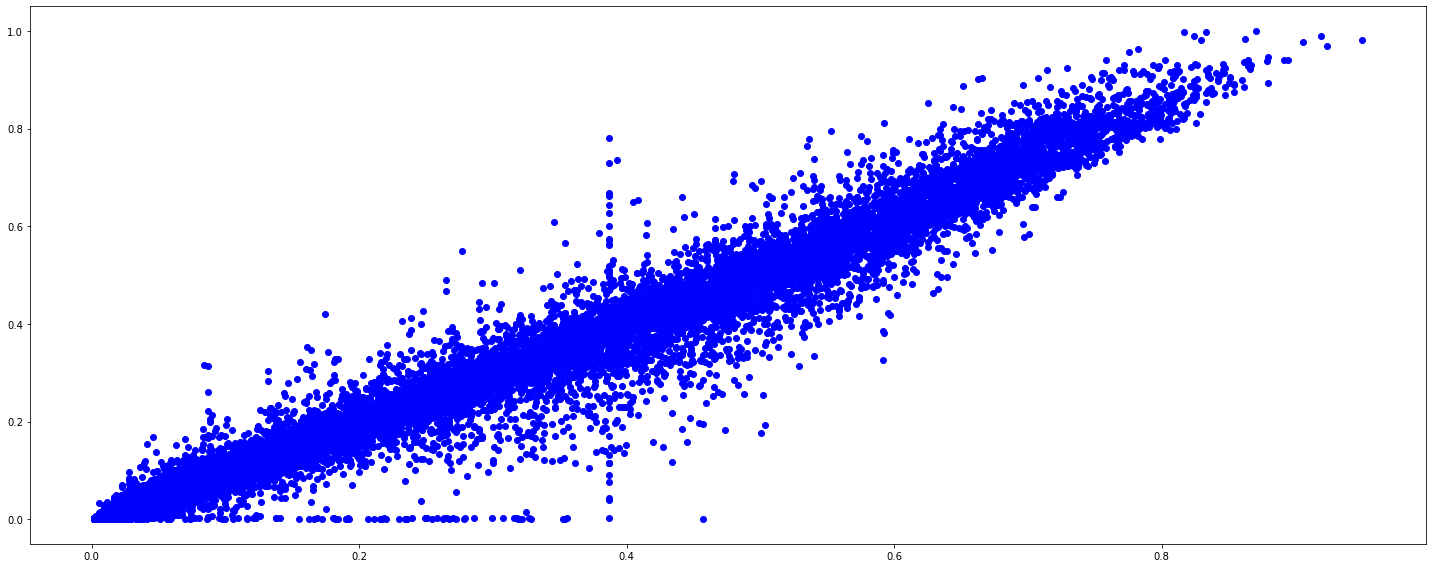

In [32]:

# Visualising the Random Forest Regression results
 
# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01

 
# Scatter plot for original data
plt.scatter(Y_pred, y_test, color = 'blue')

In [33]:
print('MSE: ', mean_squared_error(y_test, Y_pred))

MSE:  0.0018960658325554852


In [34]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred)) 
print('r2 score  is', r2_score(y_test, Y_pred))

Root Mean Squared Error: 0.043543838054947395
Mean Absolute Error: 0.02476020317583519
r2 score  is 0.9689652715670731


# GBRT

In [38]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import KFold

In [36]:
crossvalidation=KFold(n_splits=3,shuffle=True,random_state=1)
GBR=GradientBoostingRegressor()
search_grid={'n_estimators':[200,500],'learning_rate':[0.01,0.1],'max_depth':[1,2,4],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=GBR,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1,cv=3)

In [37]:
search.fit(X,y)
search.best_params_

KeyboardInterrupt: 

In [39]:
gbr = GradientBoostingRegressor(n_estimators = 500, max_depth = 4, random_state = 1,learning_rate=.01,subsample=0.5)
  
# Fit to training set
gbr.fit(X_train, y_train)
  
# Predict on test set
Pred = gbr.predict(X_test)

In [40]:
print('MSE: ', mean_squared_error(y_test, Pred))
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Pred)) 
print('r2 score  is', r2_score(y_test, Pred))

MSE:  0.008479719958320227
Root Mean Squared Error: 0.09208539492406072
Mean Absolute Error: 0.05673955038641119
r2 score  is 0.8612042885984357


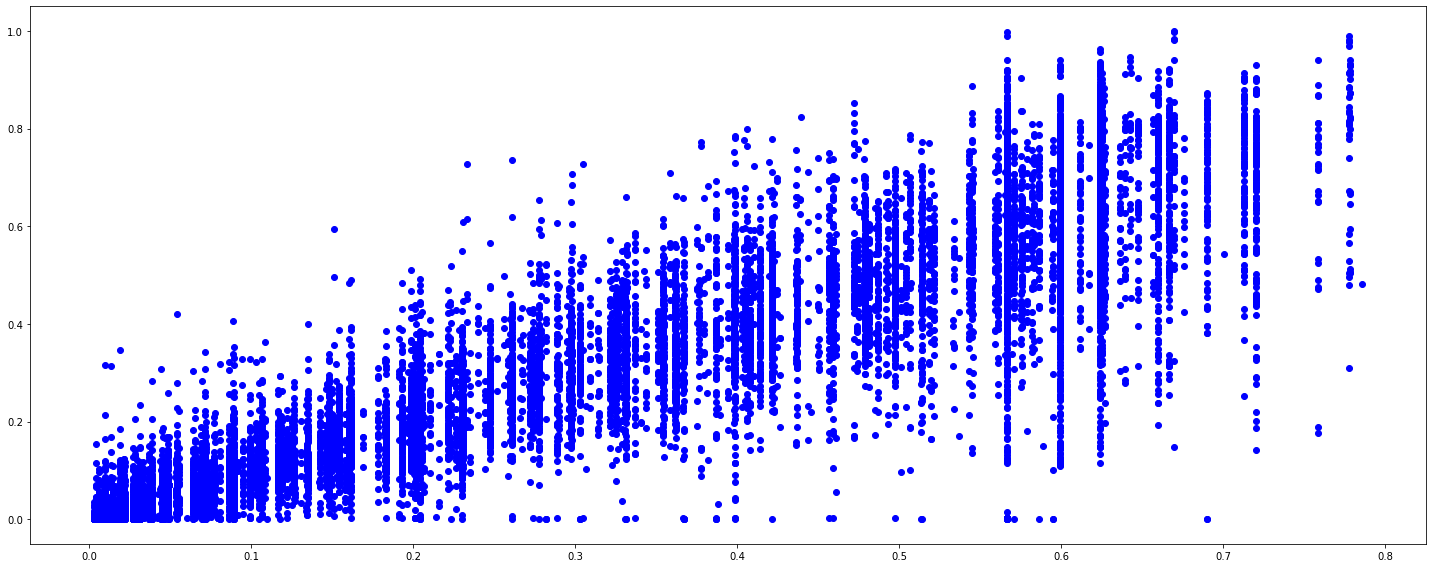

In [41]:
plt.scatter(y_pred, y_test, color = 'blue')

# XGBOOST

In [42]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
import datetime
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [ ]:
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
             
              'learning_rate': [.01, 0.1, 1], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'subsample': [0.7],
              'colsample_bytree': [0.3,0.5,0.8],
              'n_estimators':[100,200,500]}

In [ ]:
xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,verbose=True)
xgb_grid.fit(X_train,y_train)
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

In [43]:
train_dmatrix = xgb.DMatrix(data = X_train, label = y_train)
test_dmatrix = xgb.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 4,
         'n_estimators': 200, 'subsample': 0.7}
 
xgb_r = xgb.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation

from sklearn.metrics import r2_score
import sklearn.metrics as metrics
mse = (mean_squared_error(y_test, pred))
print("MSE : % f" %(mse))

[14:16:42] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "n_estimators" } are not used.

MSE :  0.023275


In [44]:
print('MSE: ', mean_squared_error(y_test, pred))
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred)) 
print('r2 score  is', r2_score(y_test, pred))

MSE:  0.023275136677815597
Root Mean Squared Error: 0.1525619109667141
Mean Absolute Error: 0.13621825755442357
r2 score  is 0.6190335094738206


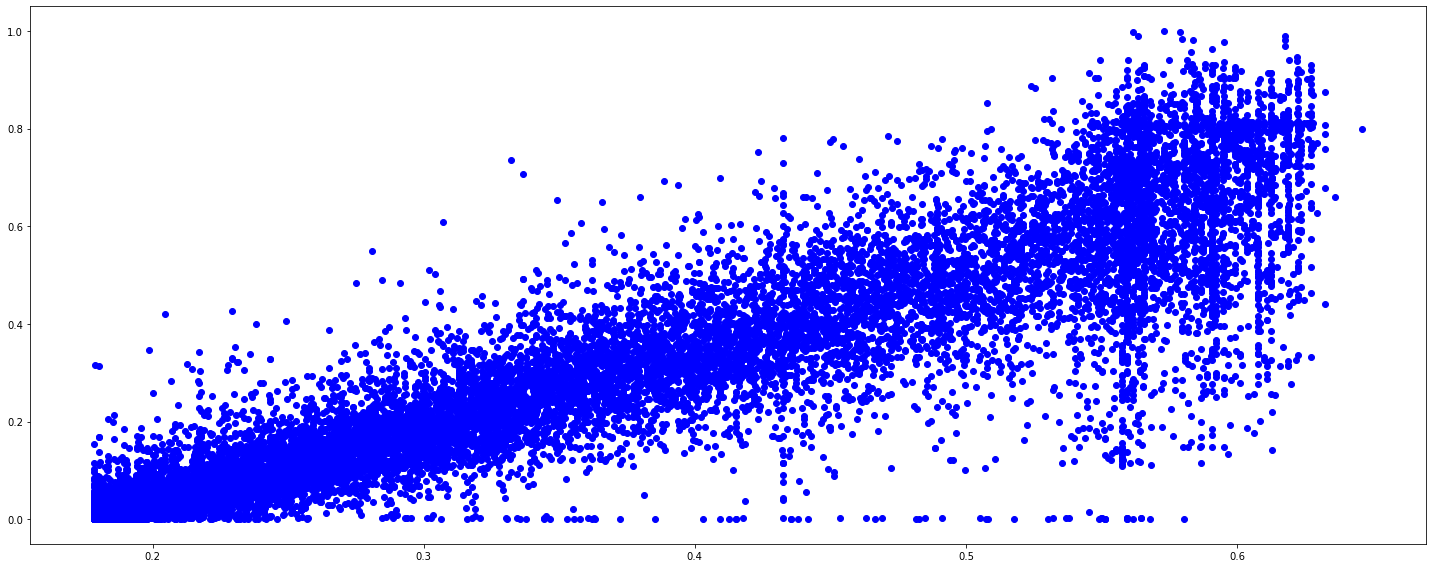

In [45]:
plt.scatter(pred, y_test, color = 'blue') 

In [ ]:
comparison = pd.DataFrame()
comparison['Actual'] = y_test
comparison['predicted'] = pred
comparison

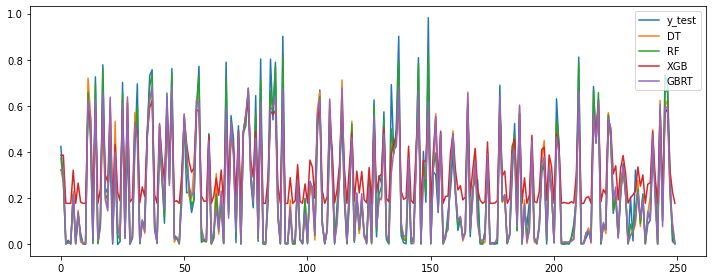

In [46]:
##init a dataframe by dict without index

plots1 = {"y_test": y_test, "DT": y_pred,"RF": Y_pred,"XGB": pred,"GBRT": Pred}
df = pd.DataFrame(plots1)
#print("The DataFrame ")
#print(df)
#print("---------------------")
df_1000 = df.iloc[:250]
plt.rcParams["figure.figsize"] = [10, 4]
plt.rcParams["figure.autolayout"] = True
df_1000.plot()
plt.show()

# Taking Windspeed and Wind direction at 50 mteres along with atmospheric data for prediction

In [47]:
data = windfarm1
data.head()

Wind speed at height of 10 meters (m/s)  \
0                                 0.086747   
1                                 0.071785   
2                                 0.086118   
3                                 0.104221   
4                                 0.088317   

   Wind direction at height of 10 meters (˚)  \
0                                   0.226518   
1                                   0.215774   
2                                   0.241513   
3                                   0.217724   
4                                   0.262675   

   Wind speed at height of 30 meters (m/s)  \
0                                 0.068215   
1                                 0.058177   
2                                 0.079248   
3                                 0.085449   
4                                 0.075102   

   Wind direction at height of 30 meters (˚)  \
0                                   0.208345   
1                                   0.208997   
2                                   0.235843   
3                                   0.208693   
4                                   0.253810   

   Wind speed at height of 50 meters (m/s)  \
0                                 0.070557   
1                                 0.059202   
2                                 0.078981   
3                                 0.086731   
4                                 0.086192   

   Wind direction at height of 50 meters (˚)  \
0                                   0.216383   
1                                   0.247213   
2                                   0.248236   
3                                   0.243129   
4                                   0.269967   

   Wind speed - at the height of wheel hub (m/s)  \
0                                       0.082454   
1                                       0.062221   
2                                       0.077694   
3                                       0.092836   
4                                       0.096671   

   Wind speed - at the height of wheel hub (˚)  \
0                                     0.207810   
1                                     0.207439   
2                                     0.248257   
3                                     0.230775   
4                                     0.259322   

   Air temperature (deg celcius)   Atmosphere (hpa)  Relative humidity (%)  \
0                        0.176681          0.526274               0.816630   
1                        0.173246          0.521391               0.821400   
2                        0.172002          0.527529               0.823845   
3                        0.173246          0.523063               0.822098   
4                        0.177295          0.528917               0.797540   

   Power (MW)  
0    0.002593  
1    0.003361  
2    0.003021  
3    0.001912  
4    0.000826

In [48]:
data = data.drop(labels=["Wind speed at height of 10 meters (m/s)","Wind direction at height of 10 meters (˚)","Wind speed at height of 30 meters (m/s)","Wind direction at height of 30 meters (˚)","Wind speed - at the height of wheel hub (m/s)","Wind speed - at the height of wheel hub (˚)"], axis=1)
data.head()

Wind speed at height of 50 meters (m/s)  \
0                                 0.070557   
1                                 0.059202   
2                                 0.078981   
3                                 0.086731   
4                                 0.086192   

   Wind direction at height of 50 meters (˚)  Air temperature (deg celcius)   \
0                                   0.216383                        0.176681   
1                                   0.247213                        0.173246   
2                                   0.248236                        0.172002   
3                                   0.243129                        0.173246   
4                                   0.269967                        0.177295   

   Atmosphere (hpa)  Relative humidity (%)  Power (MW)  
0          0.526274               0.816630    0.002593  
1          0.521391               0.821400    0.003361  
2          0.527529               0.823845    0.003021  
3          0.523063               0.822098    0.001912  
4          0.528917               0.797540    0.000826

In [49]:
X = data.iloc[:,  :-1].values
y = data.iloc[:, -1].values

In [50]:
X.shape

(70176, 5)

In [51]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
#df_train, df_test = train_test_split(windfarm1, train_size = 0.7, test_size = 0.3, random_state = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [52]:
X_test.shape

(21053, 5)

MSE:  0.009064096088260434


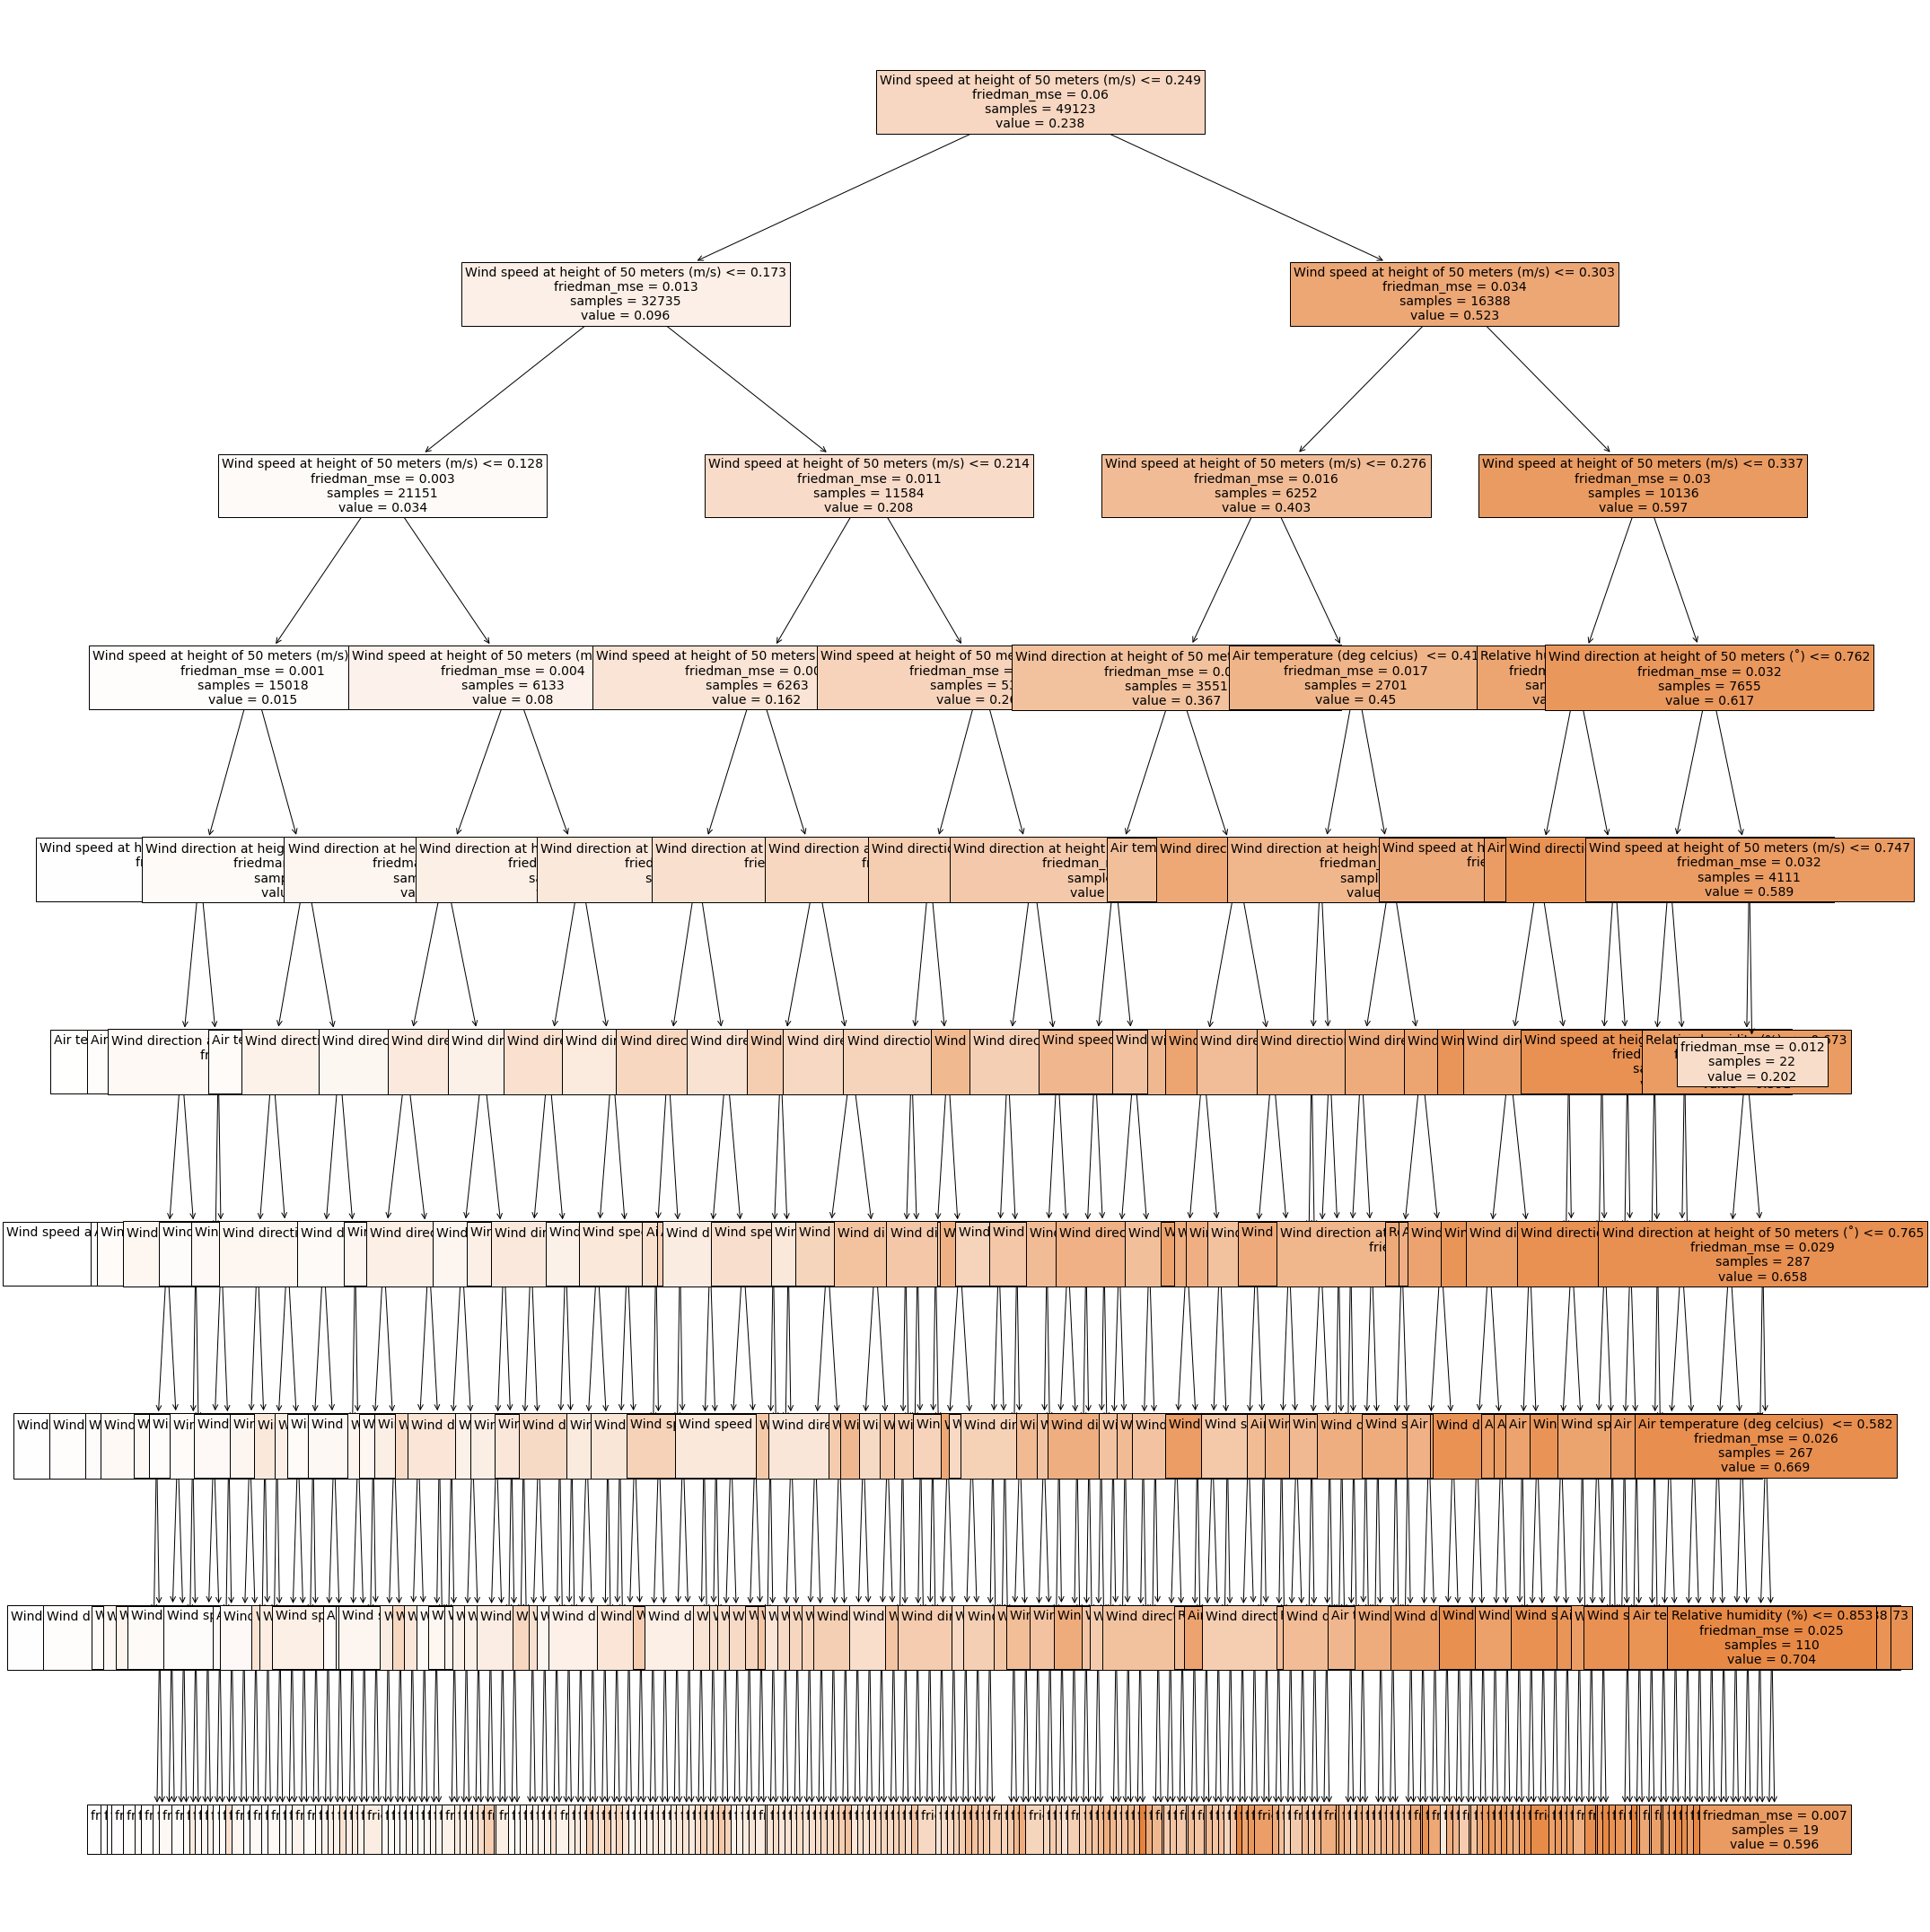

In [53]:
# create a regressor object
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(random_state = 0,max_depth= 9, min_samples_split= 50, criterion='friedman_mse') 
  
# fit the regressor with X and Y data
reg.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
feature_names = list(data.columns)
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(reg,feature_names= feature_names ,fontsize=14,filled=True)
plt.show()

In [54]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('r2 score  is', r2_score(y_test, y_pred))

Root Mean Squared Error: 0.09520554652046505
Mean Absolute Error: 0.05833068707654421
r2 score  is 0.8516392438705658


Feature: 0, Score: 0.96230
Feature: 1, Score: 0.02585
Feature: 2, Score: 0.00716
Feature: 3, Score: 0.00035
Feature: 4, Score: 0.00434


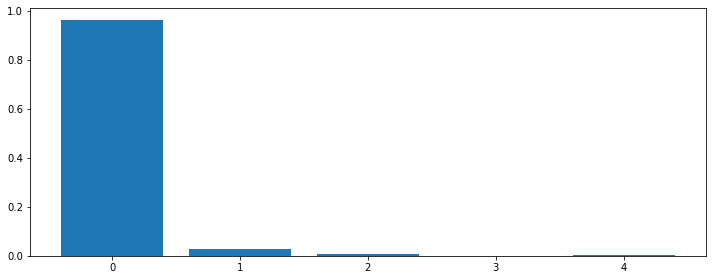

In [55]:
# get importance
importance = reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [56]:
y_pred = reg.predict(X_test)

In [57]:
comparison = pd.DataFrame()
comparison['Actual'] = y_test
comparison['predicted'] = y_pred
comparison

Actual  predicted
0      0.424553   0.320508
1      0.272725   0.330748
2      0.001905   0.003760
3      0.018269   0.003760
4      0.001434   0.010474
...         ...        ...
21048  0.080188   0.112755
21049  0.501003   0.541882
21050  0.011003   0.019843
21051  0.009178   0.005808
21052  0.865079   0.605207

[21053 rows x 2 columns]

In [58]:
print(y_pred)

[0.32050757 0.33074833 0.00375986 ... 0.01984267 0.00580763 0.6052068 ]


<AxesSubplot:xlabel='Actual', ylabel='predicted'>

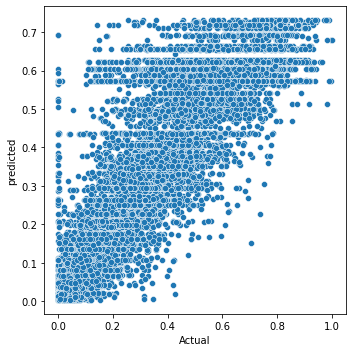

In [59]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=data,  x=comparison['Actual'], y=comparison['predicted'])

# RANDOM FOREST - 50m 

In [60]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 150, max_depth= 80,min_samples_leaf= 3,bootstrap= True,max_features= None,random_state = 0)
  
 
# fit the regressor with x and y data
regressor.fit(X, y)

RandomForestRegressor(max_depth=80, max_features=None, min_samples_leaf=3,
                      n_estimators=150, random_state=0)

In [61]:
feature_names = data.iloc[:,  :-1].values

In [62]:
Y_pred = regressor.predict(X_test)  # test the output by changing values

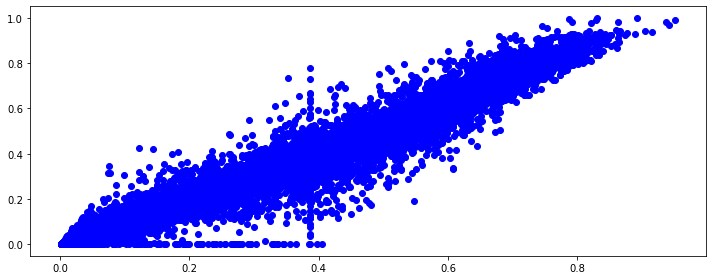

In [63]:

# Visualising the Random Forest Regression results
 
# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01

 
# Scatter plot for original data
plt.scatter(Y_pred, y_test, color = 'blue')

In [64]:
print('MSE: ', mean_squared_error(y_test, Y_pred))

MSE:  0.002337046255610161


In [65]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred)) 
print('r2 score  is', r2_score(y_test, Y_pred))

Root Mean Squared Error: 0.04834300627402231
Mean Absolute Error: 0.028496479762526075
r2 score  is 0.9617473219375006


In [66]:
comparison = pd.DataFrame()
comparison['Actual'] = y_test
comparison['predicted'] = Y_pred
comparison

Actual  predicted
0      0.424553   0.375746
1      0.272725   0.304037
2      0.001905   0.002428
3      0.018269   0.008527
4      0.001434   0.005842
...         ...        ...
21048  0.080188   0.089147
21049  0.501003   0.537500
21050  0.011003   0.020911
21051  0.009178   0.008286
21052  0.865079   0.801644

[21053 rows x 2 columns]

# XGBOOST- 50m

In [68]:
train_dmatrix = xgb.DMatrix(data = X_train, label = y_train)
test_dmatrix = xgb.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {"booster":"gbtree", "objective":"reg:linear"}
 
xgb_r = xgb.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# MSE Computation
mse = (mean_squared_error(y_test, pred))
print("MSE : % f" %(mse))

[14:20:18] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
MSE :  0.008653


In [69]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred)) 
print('r2 score  is', r2_score(y_test, pred))

Root Mean Squared Error: 0.0930219736250545
Mean Absolute Error: 0.060847732142086906
r2 score  is 0.8583666144652269


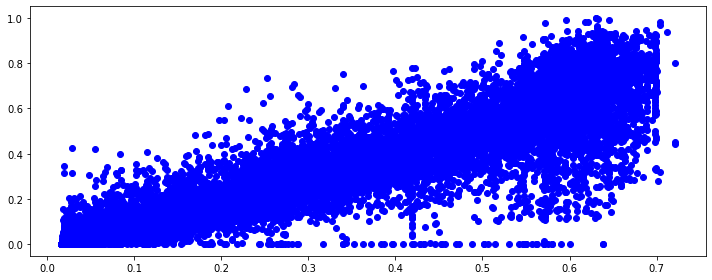

In [70]:
plt.scatter(pred, y_test, color = 'blue') 

# GBRT - 50m 

In [71]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

In [72]:
gbr = GradientBoostingRegressor(n_estimators = 500, max_depth = 4, random_state = 1,learning_rate=.01,subsample=0.5)

  
# Fit to training set
gbr.fit(X_train, y_train)
  
# Predict on test set
Pred = gbr.predict(X_test)

In [73]:
print('MSE: ', mean_squared_error(y_test, Pred))
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Pred)) 
print('r2 score  is', r2_score(y_test,Pred))

MSE:  0.008818275022282369
Root Mean Squared Error: 0.09390567087392736
Mean Absolute Error: 0.05854250597438252
r2 score  is 0.8556628330807778


# Comaprison at 50m 

In [74]:
##init a dataframe by dict without index

plots1 = {"y_test": y_test, "DT": y_pred,"RF": Y_pred,"XGB": pred,"GBRT": Pred}
df = pd.DataFrame(plots1)
#print("The DataFrame ")
#print(df)
#print("---------------------")

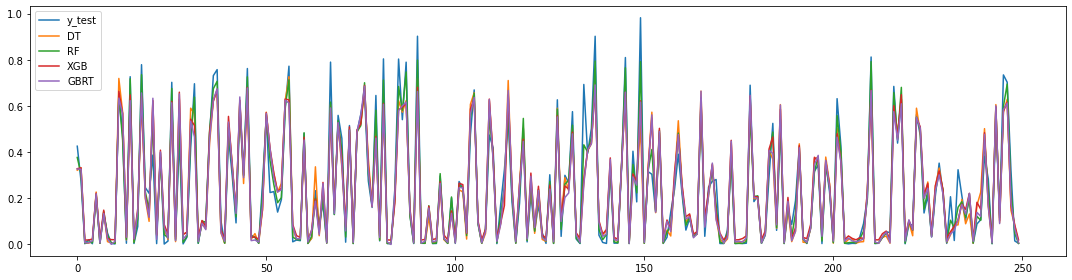

In [75]:
df_1000 = df.iloc[:250]
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
df_1000.plot()
plt.show()

# Windspeed and Wind direction at 30 mteres along with atmospheric data for prediction

In [76]:
d = windfarm1
d.head()

Wind speed at height of 10 meters (m/s)  \
0                                 0.086747   
1                                 0.071785   
2                                 0.086118   
3                                 0.104221   
4                                 0.088317   

   Wind direction at height of 10 meters (˚)  \
0                                   0.226518   
1                                   0.215774   
2                                   0.241513   
3                                   0.217724   
4                                   0.262675   

   Wind speed at height of 30 meters (m/s)  \
0                                 0.068215   
1                                 0.058177   
2                                 0.079248   
3                                 0.085449   
4                                 0.075102   

   Wind direction at height of 30 meters (˚)  \
0                                   0.208345   
1                                   0.208997   
2                                   0.235843   
3                                   0.208693   
4                                   0.253810   

   Wind speed at height of 50 meters (m/s)  \
0                                 0.070557   
1                                 0.059202   
2                                 0.078981   
3                                 0.086731   
4                                 0.086192   

   Wind direction at height of 50 meters (˚)  \
0                                   0.216383   
1                                   0.247213   
2                                   0.248236   
3                                   0.243129   
4                                   0.269967   

   Wind speed - at the height of wheel hub (m/s)  \
0                                       0.082454   
1                                       0.062221   
2                                       0.077694   
3                                       0.092836   
4                                       0.096671   

   Wind speed - at the height of wheel hub (˚)  \
0                                     0.207810   
1                                     0.207439   
2                                     0.248257   
3                                     0.230775   
4                                     0.259322   

   Air temperature (deg celcius)   Atmosphere (hpa)  Relative humidity (%)  \
0                        0.176681          0.526274               0.816630   
1                        0.173246          0.521391               0.821400   
2                        0.172002          0.527529               0.823845   
3                        0.173246          0.523063               0.822098   
4                        0.177295          0.528917               0.797540   

   Power (MW)  
0    0.002593  
1    0.003361  
2    0.003021  
3    0.001912  
4    0.000826

In [77]:
d = d.drop(labels=["Wind speed at height of 10 meters (m/s)","Wind direction at height of 10 meters (˚)","Wind speed at height of 50 meters (m/s)","Wind direction at height of 50 meters (˚)","Wind speed - at the height of wheel hub (m/s)","Wind speed - at the height of wheel hub (˚)"], axis=1)
d.head()

Wind speed at height of 30 meters (m/s)  \
0                                 0.068215   
1                                 0.058177   
2                                 0.079248   
3                                 0.085449   
4                                 0.075102   

   Wind direction at height of 30 meters (˚)  Air temperature (deg celcius)   \
0                                   0.208345                        0.176681   
1                                   0.208997                        0.173246   
2                                   0.235843                        0.172002   
3                                   0.208693                        0.173246   
4                                   0.253810                        0.177295   

   Atmosphere (hpa)  Relative humidity (%)  Power (MW)  
0          0.526274               0.816630    0.002593  
1          0.521391               0.821400    0.003361  
2          0.527529               0.823845    0.003021  
3          0.523063               0.822098    0.001912  
4          0.528917               0.797540    0.000826

In [78]:
X = d.iloc[:,  :-1].values
y = d.iloc[:, -1].values

In [79]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
#df_train, df_test = train_test_split(windfarm1, train_size = 0.7, test_size = 0.3, random_state = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [80]:
# create a regressor object
reg = DecisionTreeRegressor(random_state = 0,max_depth= 9, min_samples_split= 50, criterion='friedman_mse')
  
# fit the regressor with X and Y data
reg.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
feature_names = list(d.columns)
from sklearn import tree
plt.figure(figsize=(100,100))
tree.plot_tree(reg,feature_names= feature_names ,fontsize=14,filled=True)
plt.show()

MSE:  0.00989135667235027


In [81]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('r2 score  is', r2_score(y_test, y_pred))

Root Mean Squared Error: 0.09945529987059648
Mean Absolute Error: 0.06313201665874352
r2 score  is 0.8380986762754578


In [82]:
y_pred = reg.predict(X_test)

Feature: 0, Score: 0.94756
Feature: 1, Score: 0.03653
Feature: 2, Score: 0.00897
Feature: 3, Score: 0.00050
Feature: 4, Score: 0.00644


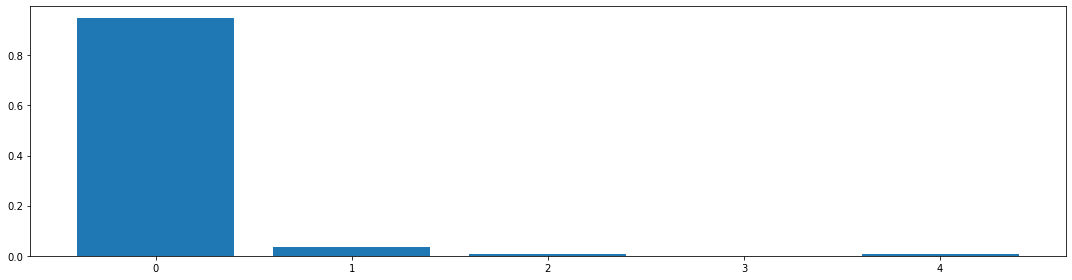

In [83]:
# get importance
importance = reg.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [84]:
comparison = pd.DataFrame()
comparison['Actual'] = y_test
comparison['predicted'] = y_pred
comparison

Actual  predicted
0      0.424553   0.313553
1      0.272725   0.301382
2      0.001905   0.003582
3      0.018269   0.003582
4      0.001434   0.006364
...         ...        ...
21048  0.080188   0.075441
21049  0.501003   0.358164
21050  0.011003   0.058678
21051  0.009178   0.006364
21052  0.865079   0.599782

[21053 rows x 2 columns]

<AxesSubplot:xlabel='Actual', ylabel='predicted'>

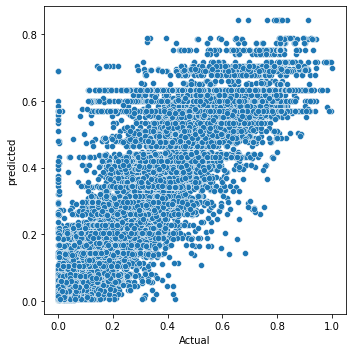

In [85]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=d,  x=comparison['Actual'], y=comparison['predicted'])

# RANDOM FOREST - 30m

In [86]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 150, max_depth= 80,min_samples_leaf= 3,bootstrap= True,max_features= None,random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X, y)

RandomForestRegressor(max_depth=80, max_features=None, min_samples_leaf=3,
                      n_estimators=150, random_state=0)

In [87]:
Y_pred = regressor.predict(X_test)  # test the output by changing values

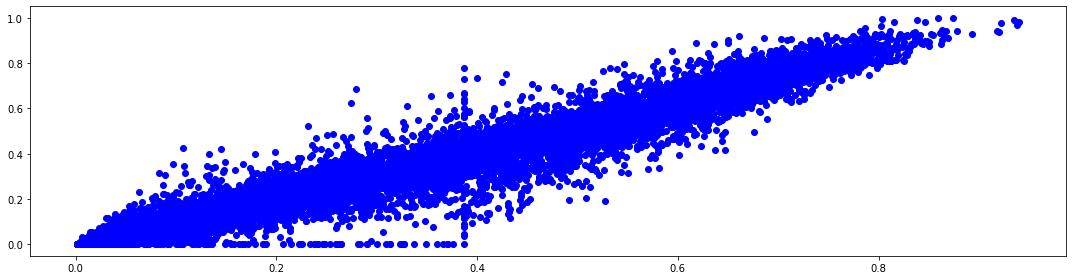

In [88]:

# Visualising the Random Forest Regression results
 
# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01

 
# Scatter plot for original data
plt.scatter(Y_pred, y_test, color = 'blue') 

In [89]:
print('MSE: ', mean_squared_error(y_test, Y_pred))


MSE:  0.00259064359805084


In [90]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred)) 
print('r2 score  is', r2_score(y_test, Y_pred))

Root Mean Squared Error: 0.05089836537700243
Mean Absolute Error: 0.031000697402840467
r2 score  is 0.9575964509504152


In [91]:
comparison = pd.DataFrame()
comparison['Actual'] = y_test
comparison['predicted'] = Y_pred
comparison

Actual  predicted
0      0.424553   0.372596
1      0.272725   0.308716
2      0.001905   0.002651
3      0.018269   0.012994
4      0.001434   0.002737
...         ...        ...
21048  0.080188   0.073512
21049  0.501003   0.483245
21050  0.011003   0.026818
21051  0.009178   0.010113
21052  0.865079   0.800002

[21053 rows x 2 columns]

In [92]:
feature_names = d.iloc[:,  :-1].values

# XGBoost- 30M

In [93]:
train_dmatrix = xgb.DMatrix(data = X_train, label = y_train)
test_dmatrix = xgb.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 4,
          'subsample': 0.7}
 
xgb_r = xgb.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation

from sklearn.metrics import r2_score
import sklearn.metrics as metrics
mse = (mean_squared_error(y_test, pred))
print("MSE : % f" %(mse))

MSE :  0.025070


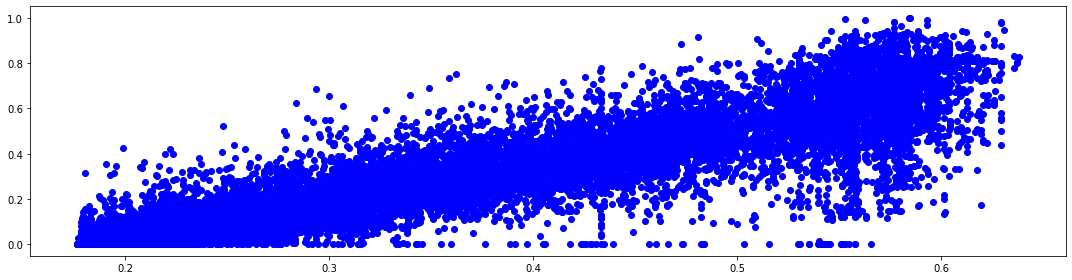

In [94]:
plt.scatter(pred, y_test, color = 'blue') 

In [95]:
comparison = pd.DataFrame()
comparison['Actual'] = y_test
comparison['predicted'] = pred
comparison

Actual  predicted
0      0.424553   0.375328
1      0.272725   0.395630
2      0.001905   0.178474
3      0.018269   0.179128
4      0.001434   0.181472
...         ...        ...
21048  0.080188   0.222572
21049  0.501003   0.401499
21050  0.011003   0.228867
21051  0.009178   0.179711
21052  0.865079   0.569771

[21053 rows x 2 columns]

In [96]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred)) 
print('r2 score  is', r2_score(y_test, pred))

Root Mean Squared Error: 0.1583337187857823
Mean Absolute Error: 0.14105032448718094
r2 score  is 0.5896623550508071


# GBRT - 30m

In [97]:
from sklearn.ensemble import GradientBoostingRegressor
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

In [98]:
gbr = GradientBoostingRegressor(n_estimators = 500, max_depth = 4, random_state = 1,learning_rate=.01,subsample=0.5)

  
# Fit to training set
gbr.fit(X_train, y_train)
  
# Predict on test set
y_pred = gbr.predict(X_test)

In [99]:
print('MSE: ', mean_squared_error(y_test, Pred))
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Pred)) 
print('r2 score  is', r2_score(y_test,Pred))

MSE:  0.008818275022282369
Root Mean Squared Error: 0.09390567087392736
Mean Absolute Error: 0.05854250597438252
r2 score  is 0.8556628330807778


# COMPARISON AT 30m

In [100]:
##init a dataframe by dict without index

plots1 = {"y_test": y_test, "DT": y_pred,"RF": Y_pred,"XGB": pred,"GBRT": Pred}
df = pd.DataFrame(plots1)
#print("The DataFrame ")
#print(df)
#print("---------------------")

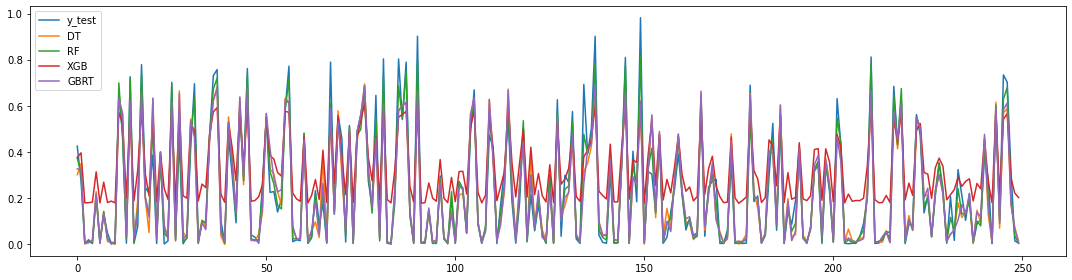

In [101]:
df_1000 = df.iloc[:250]
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
df_1000.plot()
plt.show()

# Taking Windspeed and Wind direction at 10 mteres along with atmospheric data for prediction

In [102]:
df = windfarm1
df.head()

Wind speed at height of 10 meters (m/s)  \
0                                 0.086747   
1                                 0.071785   
2                                 0.086118   
3                                 0.104221   
4                                 0.088317   

   Wind direction at height of 10 meters (˚)  \
0                                   0.226518   
1                                   0.215774   
2                                   0.241513   
3                                   0.217724   
4                                   0.262675   

   Wind speed at height of 30 meters (m/s)  \
0                                 0.068215   
1                                 0.058177   
2                                 0.079248   
3                                 0.085449   
4                                 0.075102   

   Wind direction at height of 30 meters (˚)  \
0                                   0.208345   
1                                   0.208997   
2                                   0.235843   
3                                   0.208693   
4                                   0.253810   

   Wind speed at height of 50 meters (m/s)  \
0                                 0.070557   
1                                 0.059202   
2                                 0.078981   
3                                 0.086731   
4                                 0.086192   

   Wind direction at height of 50 meters (˚)  \
0                                   0.216383   
1                                   0.247213   
2                                   0.248236   
3                                   0.243129   
4                                   0.269967   

   Wind speed - at the height of wheel hub (m/s)  \
0                                       0.082454   
1                                       0.062221   
2                                       0.077694   
3                                       0.092836   
4                                       0.096671   

   Wind speed - at the height of wheel hub (˚)  \
0                                     0.207810   
1                                     0.207439   
2                                     0.248257   
3                                     0.230775   
4                                     0.259322   

   Air temperature (deg celcius)   Atmosphere (hpa)  Relative humidity (%)  \
0                        0.176681          0.526274               0.816630   
1                        0.173246          0.521391               0.821400   
2                        0.172002          0.527529               0.823845   
3                        0.173246          0.523063               0.822098   
4                        0.177295          0.528917               0.797540   

   Power (MW)  
0    0.002593  
1    0.003361  
2    0.003021  
3    0.001912  
4    0.000826

In [103]:
df = df.drop(labels=["Wind speed at height of 30 meters (m/s)","Wind direction at height of 30 meters (˚)","Wind speed at height of 50 meters (m/s)","Wind direction at height of 50 meters (˚)","Wind speed - at the height of wheel hub (m/s)","Wind speed - at the height of wheel hub (˚)"], axis=1)
df.head()

Wind speed at height of 10 meters (m/s)  \
0                                 0.086747   
1                                 0.071785   
2                                 0.086118   
3                                 0.104221   
4                                 0.088317   

   Wind direction at height of 10 meters (˚)  Air temperature (deg celcius)   \
0                                   0.226518                        0.176681   
1                                   0.215774                        0.173246   
2                                   0.241513                        0.172002   
3                                   0.217724                        0.173246   
4                                   0.262675                        0.177295   

   Atmosphere (hpa)  Relative humidity (%)  Power (MW)  
0          0.526274               0.816630    0.002593  
1          0.521391               0.821400    0.003361  
2          0.527529               0.823845    0.003021  
3          0.523063               0.822098    0.001912  
4          0.528917               0.797540    0.000826

In [104]:
X = df.iloc[:,  :-1].values
y = df.iloc[:, -1].values

In [105]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
#df_train, df_test = train_test_split(windfarm1, train_size = 0.7, test_size = 0.3, random_state = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

MSE:  0.015084733739241045


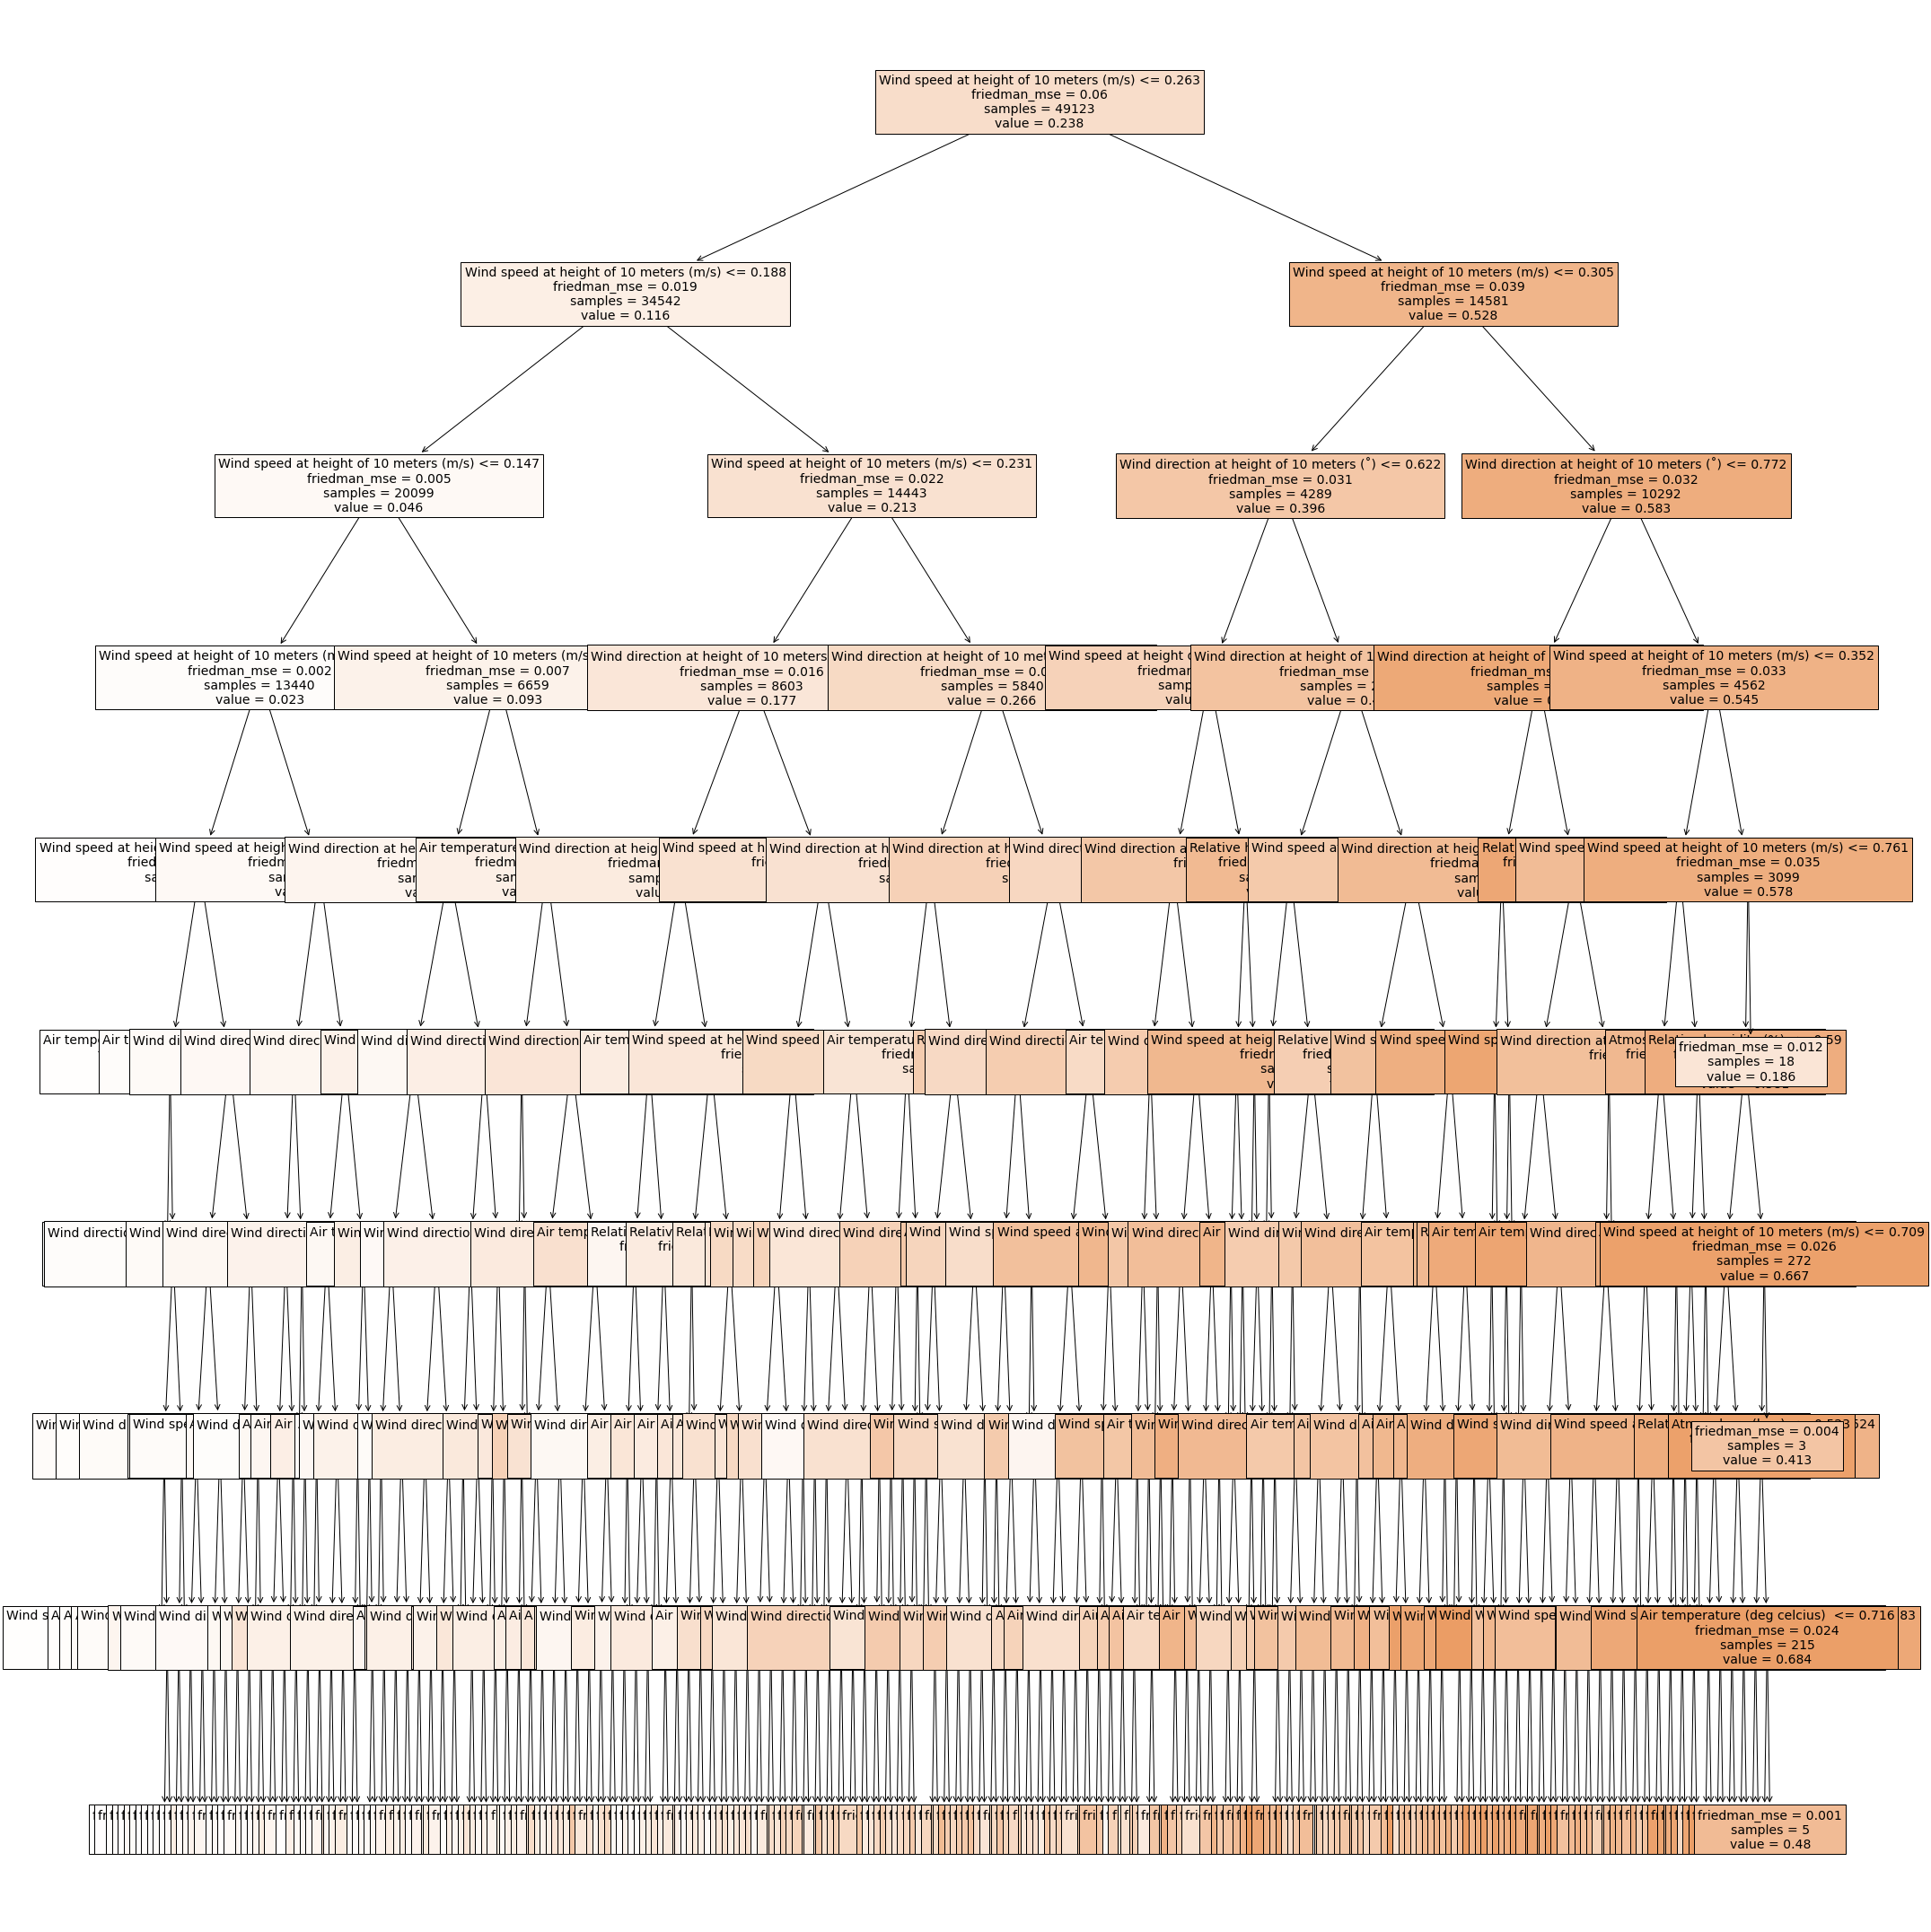

In [106]:
# create a regressor object
regr = DecisionTreeRegressor(random_state = 0,max_depth= 9, min_samples_split= 50, criterion='friedman_mse') 
  
# fit the regressor with X and Y data
regr.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_pred = reg.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
feature_names = list(df.columns)
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(regr,feature_names= feature_names ,fontsize=14,filled=True)
plt.show()

In [107]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('r2 score  is', r2_score(y_test, y_pred))

Root Mean Squared Error: 0.12281992403206023
Mean Absolute Error: 0.08486217244209227
r2 score  is 0.753093691662916


Feature: 0, Score: 0.92008
Feature: 1, Score: 0.04614
Feature: 2, Score: 0.01497
Feature: 3, Score: 0.00168
Feature: 4, Score: 0.01713


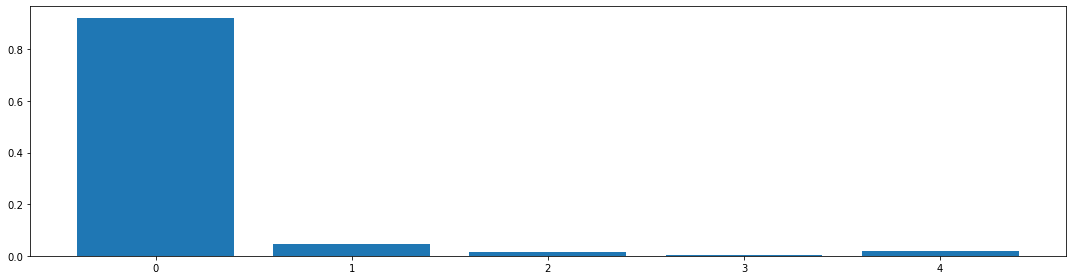

In [108]:
# get importance
importance = regr.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [109]:
y_pred = regr.predict(X_test)

In [110]:
comparison = pd.DataFrame()
comparison['Actual'] = y_test
comparison['predicted'] = y_pred
comparison

Actual  predicted
0      0.424553   0.252338
1      0.272725   0.376830
2      0.001905   0.012290
3      0.018269   0.008080
4      0.001434   0.008080
...         ...        ...
21048  0.080188   0.044263
21049  0.501003   0.320986
21050  0.011003   0.174645
21051  0.009178   0.008080
21052  0.865079   0.582825

[21053 rows x 2 columns]

<AxesSubplot:xlabel='Actual', ylabel='predicted'>

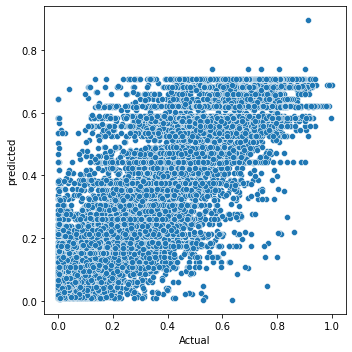

In [111]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df,  x=comparison['Actual'], y=comparison['predicted'])

# RANDOM Forest- 10m

In [112]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 150, max_depth= 80,min_samples_leaf= 3,bootstrap= True,max_features= None,random_state = 0)

 
# fit the regressor with x and y data
regressor.fit(X, y)

RandomForestRegressor(max_depth=80, max_features=None, min_samples_leaf=3,
                      n_estimators=150, random_state=0)

In [113]:
Y_pred = regressor.predict(X_test)  # test the output by changing values

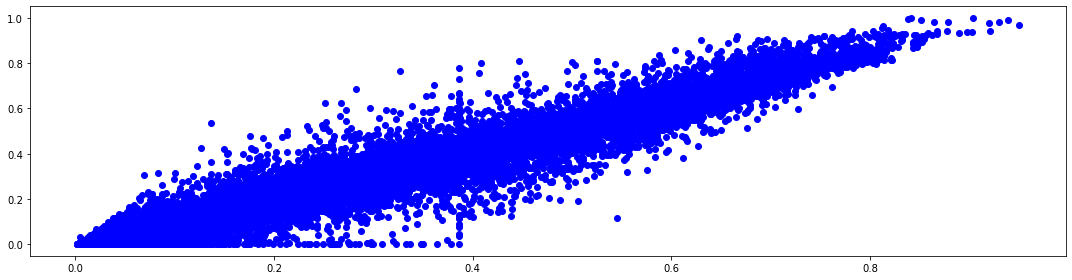

In [114]:

# Visualising the Random Forest Regression results
 
# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01

 
# Scatter plot for original data
plt.scatter(Y_pred, y_test, color = 'blue') 

In [115]:
print('MSE: ', mean_squared_error(y_test, Y_pred))

MSE:  0.0034609430644554216


In [116]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred)) 
print('r2 score  is', r2_score(y_test, Y_pred))

Root Mean Squared Error: 0.05882978042161488
Mean Absolute Error: 0.03833130497087663
r2 score  is 0.9433514246800012


In [117]:
comparison = pd.DataFrame()
comparison['Actual'] = y_test
comparison['predicted'] = Y_pred
comparison

Actual  predicted
0      0.424553   0.324533
1      0.272725   0.276632
2      0.001905   0.008744
3      0.018269   0.016310
4      0.001434   0.003124
...         ...        ...
21048  0.080188   0.067148
21049  0.501003   0.336417
21050  0.011003   0.195134
21051  0.009178   0.010956
21052  0.865079   0.779217

[21053 rows x 2 columns]

# XGBOOST - 10M

In [118]:
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {"booster":"gbtree", "objective":"reg:linear"}
 
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation
mse = (MSE(y_test, pred))
print("MSE : % f" %(mse))

NameError: name 'xg' is not defined

In [ ]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred)) 
print('r2 score  is', r2_score(y_test, pred))

In [ ]:
plt.scatter(pred, y_test, color = 'blue') 

In [ ]:
comparison = pd.DataFrame()
comparison['Actual'] = y_test
comparison['predicted'] = pred
comparison

# GBRT - 10m

In [ ]:
gbr = GradientBoostingRegressor(n_estimators = 500, max_depth = 4, random_state = 1,learning_rate=.01,subsample=0.5)

  
# Fit to training set
gbr.fit(X_train, y_train)
  
# Predict on test set
Pred = gbr.predict(X_test)

In [ ]:
print('MSE: ', mean_squared_error(y_test, Pred))
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Pred)) 
print('r2 score  is', r2_score(y_test,Pred))

# Comparison at 10m

In [ ]:
##init a dataframe by dict without index

plots1 = {"y_test": y_test, "DT": y_pred,"RF": Y_pred,"XGB": pred,"GBRT": Pred}
df = pd.DataFrame(plots1)
#print("The DataFrame ")
#print(df)
#print("---------------------")
df_1000 = df.iloc[:250]
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
df_1000.plot()
plt.show()

In [ ]:
df_1000 = df.iloc[:250]
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
df_1000.plot()
plt.show()

# Taking Windspeed and Wind direction at hubheight along with atmospheric data for prediction

In [ ]:
df1 = windfarm1
df1.head()

In [ ]:
df1 = df1.drop(labels=["Wind speed at height of 10 meters (m/s)","Wind direction at height of 10 meters (˚)","Wind speed at height of 30 meters (m/s)","Wind direction at height of 30 meters (˚)","Wind speed at height of 50 meters (m/s)","Wind direction at height of 50 meters (˚)"], axis=1)
df1.head()

In [ ]:
X = df1.iloc[:, :-1].values
y = df1.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split

# We specify random seed so that the train and test data set always have the same rows, respectively
#np.random.seed(0)
#df_train, df_test = train_test_split(windfarm1, train_size = 0.7, test_size = 0.3, random_state = 100
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
# create a regressor object
regrs = DecisionTreeRegressor(random_state = 0,max_depth= 9, min_samples_split= 50, criterion='friedman_mse') 
  
# fit the regressor with X and Y data
regrs.fit(X_train, y_train)
from sklearn.metrics import mean_squared_error
y_pred = regrs.predict(X_test)
print('MSE: ', mean_squared_error(y_test, y_pred))
feature_names = list(df1.columns)
from sklearn import tree
plt.figure(figsize=(30,30))
tree.plot_tree(regrs,feature_names= feature_names ,fontsize=14,filled=True)
plt.show()

In [ ]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('r2 score  is', r2_score(y_test, y_pred))

In [ ]:
# get importance
importance = regrs.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [ ]:
y_pred = regrs.predict(X_test)

In [ ]:
comparison = pd.DataFrame()
comparison['Actual'] = y_test
comparison['predicted'] = y_pred
comparison

In [ ]:
plt.figure(figsize=(5,5))
sns.scatterplot(data=df1,  x=comparison['Actual'], y=comparison['predicted'])

# RANDOM FOREST -Hub level

In [ ]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 150, max_depth= 80,min_samples_leaf= 3,bootstrap= True,max_features= None,random_state = 0)
 
# fit the regressor with x and y data
regressor.fit(X, y)

In [ ]:
Y_pred = regressor.predict(X_test)  # test the output by changing values

In [ ]:
# Visualising the Random Forest Regression results
 
# arrange for creating a range of values
# from min value of x to max
# value of x with a difference of 0.01

 
# Scatter plot for original data
plt.scatter(Y_pred, y_test, color = 'blue')

In [ ]:
print('MSE: ', mean_squared_error(y_test, Y_pred))

In [ ]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Y_pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Y_pred)) 
print('r2 score  is', r2_score(y_test, Y_pred))

In [ ]:
comparison = pd.DataFrame()
comparison['Actual'] = y_test
comparison['predicted'] = Y_pred
comparison

# XGBoost- HUB HEIGHT

In [ ]:
train_dmatrix = xg.DMatrix(data = X_train, label = y_train)
test_dmatrix = xg.DMatrix(data = X_test, label = y_test)
 
# Parameter dictionary specifying base learner
param = {"booster":"gbtree", "objective":"reg:linear"}
 
xgb_r = xg.train(params = param, dtrain = train_dmatrix, num_boost_round = 10)
pred = xgb_r.predict(test_dmatrix)
 
# RMSE Computation
mse = (MSE(y_test, pred))
print("MSE : % f" %(mse))

In [ ]:
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred)) 
print('r2 score  is', r2_score(y_test, pred))

In [ ]:
plt.scatter(pred, y_test, color = 'blue') 

In [ ]:
comparison = pd.DataFrame()
comparison['Actual'] = y_test
comparison['predicted'] = pred
comparison

# GBRT- HUB level

In [ ]:
gbr = GradientBoostingRegressor(n_estimators = 500, max_depth = 4, random_state = 1,learning_rate=.01,subsample=0.5)

  
# Fit to training set
gbr.fit(X_train, y_train)
  
# Predict on test set
Pred = gbr.predict(X_test)

In [ ]:
print('MSE: ', mean_squared_error(y_test, Pred))
from sklearn.metrics import r2_score
import sklearn.metrics as metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, Pred)))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, Pred)) 
print('r2 score  is', r2_score(y_test,Pred))

In [ ]:
##init a dataframe by dict without index

plots1 = {"y_test": y_test, "DT": y_pred,"RF": Y_pred,"XGB": pred,"GBRT": Pred}
df = pd.DataFrame(plots1)
#print("The DataFrame ")
#print(df)
#print("---------------------")

In [ ]:
df_1000 = df.iloc[:250]
plt.rcParams["figure.figsize"] = [15, 4]
plt.rcParams["figure.autolayout"] = True
df_1000.plot()
plt.show()